###  地理编码

In [1]:
import pandas as pd
import requests
key='334190ffbcbd51cfe6c7f81594a9b9de'

In [2]:
def geocode(address,city=None,batch=None,sig=None)->dict:
    """获取地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/geo?parameters'
    params={
        'key': key,
        'address':address,
        'city':city,
        'batch':batch,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
鼎盛广场 = geocode(address='霞山区鼎盛广场',city='广东湛江')
print(鼎盛广场)
鼎盛广场地理编码 = 鼎盛广场['geocodes'][0]['location']
print("鼎盛广场地理编码:",鼎盛广场地理编码)

{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '1', 'geocodes': [{'formatted_address': '广东省湛江市霞山区鼎盛广场', 'country': '中国', 'province': '广东省', 'citycode': '0759', 'city': '湛江市', 'district': '霞山区', 'township': [], 'neighborhood': {'name': [], 'type': []}, 'building': {'name': [], 'type': []}, 'adcode': '440803', 'street': [], 'number': [], 'location': '110.402470,21.210245', 'level': '兴趣点'}]}
鼎盛广场地理编码: 110.402470,21.210245


In [3]:
df_鼎盛 = pd.json_normalize(鼎盛广场['geocodes'])
df_鼎盛

,formatted_address,country,province,citycode,city,district,township,adcode,street,number,location,level,neighborhood.name,neighborhood.type,building.name,building.type
0,广东省湛江市霞山区鼎盛广场,中国,广东省,0759,湛江市,霞山区,[],440803,[],[],"110.402470,21.210245",兴趣点,[],[],[],[]


### 逆地理编码

In [4]:
def regeocode(location,poitype=None,radius=None,extensions="base",batch=False,roadlevel=None,sig=None,homeorcorp=None)->dict:
    """获取逆地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/regeo?parameters'
    params={
        'key': key,
        'location':location,
        'poitype':poitype,
        'radius':radius,
        'extensions':extensions,
        'batch':batch,
        'roadlevel':roadlevel,
        'homeorcorp':homeorcorp,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

鼎盛广场逆地理编码 = regeocode(鼎盛广场地理编码)
print(鼎盛广场逆地理编码)

{'status': '1', 'regeocode': {'addressComponent': {'city': '湛江市', 'province': '广东省', 'adcode': '440803', 'district': '霞山区', 'towncode': '440803011000', 'streetNumber': {'number': '79号', 'location': '110.401939,21.2103619', 'direction': '西', 'distance': '56.5737', 'street': '绿塘路'}, 'country': '中国', 'township': '新园街道', 'businessAreas': [[]], 'building': {'name': [], 'type': []}, 'neighborhood': {'name': [], 'type': []}, 'citycode': '0759'}, 'formatted_address': '广东省湛江市霞山区新园街道鼎盛广场鼎盛悦府'}, 'info': 'OK', 'infocode': '10000'}


In [5]:
df_鼎盛广场逆地理编码 = pd.json_normalize(鼎盛广场逆地理编码).T
df_鼎盛广场逆地理编码

,0
status,1
info,OK
infocode,10000
regeocode.addressComponent.city,湛江市
regeocode.addressComponent.province,广东省
regeocode.addressComponent.adcode,440803
regeocode.addressComponent.district,霞山区
regeocode.addressComponent.towncode,440803011000
regeocode.addressComponent.streetNumber.number,79号
regeocode.addressComponent.streetNumber.location,"110.401939,21.2103619"


- 1.用地理编码和逆地理编码时，都可以涉及到语音识别，通过语音输入，然后语音输出调用结果；
- 2.在调用地理编码时，可以尝试增加一个参数是用户输入城市后，然后传入一张具有用户目标标志性的图片，然后可以识别出具体地址调用此功能；
- 3.在输出逆地理编码调用结果时，可以尝试返回一张用户目标地点标志性的图片，助于用户更快捷知晓具体地址；

### 路径规划-步行

In [6]:
def walking(origin,destination,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/walking?parameters'
    params={
        'key':key,
        'origin':origin,
        'destination':destination,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
万达广场 = geocode('广东省湛江市万达广场')
万达广场_location = 万达广场['geocodes'][0]['location']
鼎盛广场_location = 鼎盛广场['geocodes'][0]['location']
鼎盛广场_万达广场 = walking(鼎盛广场_location,万达广场_location)
鼎盛广场_万达广场

{'status': '1',
 'info': 'ok',
 'infocode': '10000',
 'count': '1',
 'route': {'origin': '110.402470,21.210245',
  'destination': '110.405840,21.248376',
  'paths': [{'distance': '6010',
    'duration': '4808',
    'steps': [{'instruction': '向西南步行151米右转',
      'orientation': '西南',
      'road': [],
      'distance': '151',
      'duration': '121',
      'polyline': '110.402487,21.210221;110.402383,21.210152;110.40194,21.209896;110.40194,21.209896;110.401875,21.209852;110.401775,21.209835;110.401775,21.209835;110.401172,21.209618',
      'action': '右转',
      'assistant_action': [],
      'walk_type': '0'},
     {'instruction': '沿人民大道南向北步行170米向右前方行走',
      'orientation': '北',
      'road': '人民大道南',
      'distance': '170',
      'duration': '136',
      'polyline': '110.401168,21.209614;110.400881,21.210391;110.400881,21.210391;110.400937,21.210451;110.400937,21.210616;110.400968,21.210707;110.400968,21.210707;110.400712,21.210842;110.400712,21.210842;110.400677,21.210938',
      'act

In [7]:
df_鼎盛_万达 = pd.json_normalize(鼎盛广场_万达广场["route"]["paths"][0]['steps'])
display(df_鼎盛_万达)
df_鼎盛_万达["instruction"]

,instruction,orientation,road,distance,duration,polyline,action,assistant_action,walk_type
0,向西南步行151米右转,西南,[],151,121,"110.402487,21.210221;110.402383,21.210152;110....",右转,[],0
1,沿人民大道南向北步行170米向右前方行走,北,人民大道南,170,136,"110.401168,21.209614;110.400881,21.210391;110....",向右前方行走,[],0
2,步行25米左转,[],[],25,20,"110.400673,21.210938;110.400807,21.211133",左转,[],1
3,沿人民大道中步行32米右转,[],人民大道中,32,26,"110.400807,21.211133;110.400738,21.211185;110....",右转,[],0
4,沿人民大道中向北步行1284米,北,人民大道中,1284,1027,"110.400525,21.211233;110.400104,21.212274;110....",[],[],0
5,沿上坡东路步行67米左转,[],上坡东路,67,54,"110.396046,21.222044;110.396046,21.222188;110....",左转,[],0
6,步行13米右转,[],[],13,10,"110.395924,21.222626;110.395807,21.222665",右转,[],1
7,沿人民大道中向北步行5米向右前方行走,北,人民大道中,5,4,"110.395803,21.222665;110.395786,21.222717",向右前方行走,[],0
8,步行15米左转,[],[],15,12,"110.395781,21.222717;110.395855,21.22283",左转,[],1
9,沿人民大道中步行26米向右前方行走,[],人民大道中,26,21,"110.395855,21.22283;110.395764,21.222886;110.3...",向右前方行走,[],0


0              向西南步行151米右转
1     沿人民大道南向北步行170米向右前方行走
2                  步行25米左转
3            沿人民大道中步行32米右转
4          沿人民大道中向北步行1284米
5             沿上坡东路步行67米左转
6                  步行13米右转
7       沿人民大道中向北步行5米向右前方行走
8                  步行15米左转
9        沿人民大道中步行26米向右前方行走
10    沿人民大道中向北步行590米向右前方行走
11    沿人民大道中向北步行380米向右前方行走
12             步行34米向右前方行走
13     沿乐山路向东北步行113米向右前方行走
14         沿乐山路向东北步行244米左转
15                 步行42米右转
16           沿乐山路向东北步行314米
17           沿乐山路向东北步行875米
18         沿乐山路向东北步行387米左转
19       沿海滨大道中向西北步行732米直行
20        沿海滨大道北向西北步行49米右转
21         沿澳门路向东北步行297米左转
22               向北步行59米左转
23          向西南步行106米到达目的地
Name: instruction, dtype: object

### 路径规划-驾车

In [8]:
def driving(origin,destination,city,cityd=None,extensions='base',strategy=None,nightflag=0,date=None,time=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/driving?parameters'
    params={
        'key':key,
        'origin':origin,
        'destination':destination,
        'city':city,
        'cityd':cityd,
        'extensions':extensions,
        'strategy':strategy,
        'nightflag':nightflag,
        'date':date,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

# C-2 准备walking 参数
鼎盛广场_location = 鼎盛广场['geocodes'][0]['location']
万达广场_location = 万达广场['geocodes'][0]['location']
print("(起点)鼎盛广场_location:",鼎盛广场_location,"(终点)万达广场_location:",万达广场_location)

(起点)鼎盛广场_location: 110.402470,21.210245 (终点)万达广场_location: 110.405840,21.248376


In [9]:
# C-3 驾车路径规划
鼎盛_万达 = driving(鼎盛广场_location,万达广场_location,city='湛江',extensions='all')
df_drive = pd.json_normalize(鼎盛_万达)
df_drive

,status,info,infocode,count,route.origin,route.destination,route.taxi_cost,route.paths
0,1,OK,10000,1,"110.402470,21.210245","110.405840,21.248376",17,"[{'distance': '6358', 'duration': '1374', 'str..."


In [10]:
pd.json_normalize(鼎盛_万达["route"]['paths'][0]['steps'])

,instruction,orientation,distance,tolls,toll_distance,toll_road,duration,polyline,action,assistant_action,tmcs,cities,road
0,向西南行驶152米右转,西南,152,0,0,[],67,"110.402489,21.210218;110.402382,21.210142;110....",右转,[],"[{'lcode': [], 'distance': '68', 'status': '未知...","[{'name': '湛江市', 'citycode': '0759', 'adcode':...",NaN
1,沿人民大道南途径人民大道中向北行驶2.5千米进入环岛,北,2550,0,0,[],807,"110.401161,21.209614;110.400879,21.210392;110....",进入环岛,[],"[{'lcode': [], 'distance': '91', 'status': '畅通...","[{'name': '湛江市', 'citycode': '0759', 'adcode':...",人民大道南
2,向西北行驶139米离开环岛,西北,139,0,0,[],15,"110.392601,21.231258;110.392639,21.231348;110....",离开环岛,[],"[{'lcode': [], 'distance': '34', 'status': '畅通...","[{'name': '湛江市', 'citycode': '0759', 'adcode':...",NaN
3,沿人民大道中向西北行驶1.1千米向右前方行驶进入右转专用道,西北,1120,0,0,[],148,"110.392059,21.232204;110.391815,21.232422;110....",向右前方行驶,进入右转专用道,"[{'lcode': [], 'distance': '35', 'status': '畅通...","[{'name': '湛江市', 'citycode': '0759', 'adcode':...",人民大道中
4,沿龙潮路向东北行驶2.1千米右转,东北,2112,0,0,[],260,"110.38797,21.241617;110.388062,21.241922;110.3...",右转,[],"[{'lcode': [], 'distance': '64', 'status': '畅通...","[{'name': '湛江市', 'citycode': '0759', 'adcode':...",龙潮路
5,向东南行驶178米右转,东南,178,0,0,[],38,"110.405991,21.250246;110.406754,21.248806",右转,[],"[{'lcode': [], 'distance': '178', 'status': '畅...","[{'name': '湛江市', 'citycode': '0759', 'adcode':...",NaN
6,向西南行驶107米到达目的地,西南,107,0,0,[],39,"110.406754,21.248806;110.405838,21.248377",[],到达目的地,"[{'lcode': [], 'distance': '107', 'status': '未...","[{'name': '湛江市', 'citycode': '0759', 'adcode':...",NaN


- 路径规划中已经含有语音识别功能，我还是认为可以尝试加入Python使用域模型，也像在返回结果时返回图片更易于用户识别，虽然这可能是一个大工程，但在将来我有信心认为可以实现。

### 行政区域查询

In [11]:
def district(keywords,subdistrict=None,page=None,offset=None,extensions='base',filter=None,)->dict:
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':key,
        'keywords':keywords,
        'subdistrict':subdistrict,
        'page':page,
        'offset':offset,
        'extensions':extensions,
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
行政区域 = district(keywords='广东',extensions='all',subdistrict=3)
df_行政区域_1级 = pd.json_normalize(行政区域["districts"][0]['districts'])
df_行政区域_2级_广州市 = pd.json_normalize(行政区域["districts"][0]['districts'][20]['districts'])
display(df_行政区域_1级,df_行政区域_2级_广州市)

,citycode,adcode,name,center,level,districts
0,0758,441200,肇庆市,"112.472529,23.051546",city,"[{'citycode': '0758', 'adcode': '441224', 'nam..."
1,0757,440600,佛山市,"113.122717,23.028762",city,"[{'citycode': '0757', 'adcode': '440607', 'nam..."
2,0754,440500,汕头市,"116.708463,23.37102",city,"[{'citycode': '0754', 'adcode': '440513', 'nam..."
3,0752,441300,惠州市,"114.412599,23.079404",city,"[{'citycode': '0752', 'adcode': '441324', 'nam..."
4,0755,440300,深圳市,"114.085947,22.547",city,"[{'citycode': '0755', 'adcode': '440306', 'nam..."
5,0756,440400,珠海市,"113.553986,22.224979",city,"[{'citycode': '0756', 'adcode': '440402', 'nam..."
6,0759,440800,湛江市,"110.364977,21.274898",city,"[{'citycode': '0759', 'adcode': '440883', 'nam..."
7,0662,441700,阳江市,"111.975107,21.859222",city,"[{'citycode': '0662', 'adcode': '441781', 'nam..."
8,0660,441500,汕尾市,"115.364238,22.774485",city,"[{'citycode': '0660', 'adcode': '441523', 'nam..."
9,0768,445100,潮州市,"116.632301,23.661701",city,"[{'citycode': '0768', 'adcode': '445122', 'nam..."


,citycode,adcode,name,center,level,districts
0,020,440117,从化区,"113.587386,23.545283",district,"[{'citycode': '020', 'adcode': '440117', 'name..."
1,020,440115,南沙区,"113.53738,22.794531",district,"[{'citycode': '020', 'adcode': '440115', 'name..."
2,020,440114,花都区,"113.211184,23.39205",district,"[{'citycode': '020', 'adcode': '440114', 'name..."
3,020,440113,番禺区,"113.364619,22.938582",district,"[{'citycode': '020', 'adcode': '440113', 'name..."
4,020,440103,荔湾区,"113.243038,23.124943",district,"[{'citycode': '020', 'adcode': '440103', 'name..."
5,020,440105,海珠区,"113.262008,23.103131",district,"[{'citycode': '020', 'adcode': '440105', 'name..."
6,020,440111,白云区,"113.262831,23.162281",district,"[{'citycode': '020', 'adcode': '440111', 'name..."
7,020,440118,增城区,"113.829579,23.290497",district,"[{'citycode': '020', 'adcode': '440118', 'name..."
8,020,440112,黄埔区,"113.450761,23.103239",district,"[{'citycode': '020', 'adcode': '440112', 'name..."
9,020,440106,天河区,"113.335367,23.13559",district,"[{'citycode': '020', 'adcode': '440106', 'name..."


### 搜索POI

In [12]:
def place_around(location,keywords=None,types=None,city=None,redius=None,sortrule=None,offset=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/around?parameters'
    params={
        'key':key,
        'keywords':keywords,
        'location':location,
        'types':types,
        'city':city,
        'redius':redius,
        'sortrule':sortrule,
        'offset':offset,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [13]:
万达广场_周边POI = place_around(万达广场_location)
万达广场_周边POI

{'status': '1',
 'count': '900',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B0FFK2F97E',
   'parent': [],
   'childtype': [],
   'name': '曼丽轩美容养生纹绣(万达金街店)',
   'type': '生活服务;生活服务场所;生活服务场所',
   'typecode': '070000',
   'biz_type': [],
   'address': '海滨大道中万达广场金街2层230号',
   'location': '110.405860,21.248318',
   'tel': '18826231589',
   'distance': '6',
   'biz_ext': [],
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []},
  {'id': 'B0FFLLB33K',
   'parent': 'B0FFFO3XHG',
   'childtype': '202',
   'name': '怪兽充电(摩能万达广场)',
   'type': '生活服务;共享设备;充电宝',
   'typecode': '072101',
   'biz_type': [],
   'address': '海滨大道128号万达广场3F层',
   'location': '110.405818,21.248438',
   'tel': [],
   'distance': '7',
   'biz_ext': [],
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []},
  {'id': 'B0FFKXB7JX',
   'parent': 'B0FFFO3XHG',
   'childtype': '201',
   'name'

In [14]:
df_万达广场_周边POI = pd.json_normalize(万达广场_周边POI['pois'])
df_万达广场_周边POI

,id,parent,childtype,name,type,typecode,biz_type,address,location,tel,distance,biz_ext,importance,shopid,shopinfo,poiweight,photos
0,B0FFK2F97E,[],[],曼丽轩美容养生纹绣(万达金街店),生活服务;生活服务场所;生活服务场所,070000,[],海滨大道中万达广场金街2层230号,"110.405860,21.248318",18826231589,6,[],[],[],0,[],[]
1,B0FFLLB33K,B0FFFO3XHG,202,怪兽充电(摩能万达广场),生活服务;共享设备;充电宝,072101,[],海滨大道128号万达广场3F层,"110.405818,21.248438",[],7,[],[],[],0,[],[]
2,B0FFKXB7JX,B0FFFO3XHG,201,摩能(万达广场),餐饮服务;餐饮相关场所;餐饮相关,050000,diner,海滨大道128号万达广场3F层,"110.405818,21.248438",15976827751,7,[],[],[],0,[],[]
3,B0FFKWMH2E,B0FFFO3XHG,202,来电(都市邻居万达金街店),生活服务;共享设备;充电宝,072101,[],海滨大道中82号万达广场金街3-119,"110.405870,21.248271",4008845966,12,[],[],[],0,[],[]
4,B0FFI7988W,B0FFFO3XHG,201,咱外婆家的菜(万达广场),餐饮服务;餐饮相关场所;餐饮相关,050000,diner,海滨大道128号万达广场3F层,"110.405982,21.248457",0759-3381812,17,[],[],[],0,[],[]
5,B0FFIV1399,[],[],巴比酷肉蟹煲主题餐厅(万达金街店),餐饮服务;餐饮相关场所;餐饮相关,050000,diner,海滨大道中128号湛江万达广场3幢1层17-18号,"110.405773,21.248562",15767016618,21,[],[],[],0,[],[]
6,B0FFKJ59L7,B0FFFO3XHG,202,街电(小鹿泡芙),生活服务;共享设备;充电宝,072101,[],海滨大道中128号万达广场金街1层1栋128号,"110.405637,21.248322",[],21,[],[],[],0,[],[]
7,B0FFJ7BQAN,B0FFFO3XHG,202,小鹿泡芙,餐饮服务;餐饮相关场所;餐饮相关,050000,diner,海滨大道中128号万达广场金街1层1栋128号,"110.405637,21.248322",15766399405,21,[],[],[],0,[],[]
8,B0FFH02CS2,B0FFFO3XHG,201,蓉李记(万达广场),餐饮服务;中餐厅;特色/地方风味餐厅|餐饮服务;中餐厅;四川菜(川菜),050118|050102,diner,海滨大道中128号万达广场3层3033号,"110.405629,21.248361",15828055906;0759-3602989,21,[],[],[],0,[],[]
9,B0FFKNLG7H,[],[],街电(艳美酸菜鱼万达金街),生活服务;共享设备;充电宝,072101,[],海滨大道中万达金街三栋114号,"110.405594,21.248301",[],26,[],[],[],0,[],[]


- 在调用搜索POI功能是，返回结果时，是否可以对周边POI有一个热度排名。

### IP定位

In [15]:
def orientation(ip=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/ip?parameters'
    params={
        'key':key,
        'ip':ip,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [18]:
北京_IP = orientation('114.247.50.2')
北京_IP

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'province': '北京市',
 'city': '北京市',
 'adcode': '110000',
 'rectangle': '116.0119343,39.66127144;116.7829835,40.2164962'}

In [20]:
df_IP = pd.json_normalize(北京_IP)
df_IP

,status,info,infocode,province,city,adcode,rectangle
0,1,OK,10000,北京市,北京市,110000,"116.0119343,39.66127144;116.7829835,40.2164962"


- 对历史搜索IP定位具有记录功能

### 批量请求接口

In [30]:
import json
def request_port(x,y):
    url = 'https://restapi.amap.com/v3/batch?key=334190ffbcbd51cfe6c7f81594a9b9de'
    headers = {'Content-Type':'application/json'}
    body = {"ops":
            [{"url": '/v3/place/around?offset=10&page=1&key=334190ffbcbd51cfe6c7f81594a9b9de&output=json&radius=100000&types=080000&location='+ x
            },
             {"url": '/v3/place/around?offset=10&page=1&key=334190ffbcbd51cfe6c7f81594a9b9de&output=json&radius=100000&types=080000&location='+ y
            }]}
    params = {'key':'334190ffbcbd51cfe6c7f81594a9b9de'}
    r = requests.post(url,params=params,headers=headers,json=body)
    data = r.json()
    return data


In [38]:
port = request_port(鼎盛广场_location,万达广场_location)
port

[{'status': 200,
  'body': {'suggestion': {'keywords': {}, 'cities': {}},
   'info': 'OK',
   'status': '1',
   'count': '375',
   'pois': [{'typecode': '080110',
     'adname': '霞山区',
     'biz_type': {},
     'id': 'B0FFJ9Y9WD',
     'pname': '广东省',
     'importance': {},
     'parent': 'B02F702ASJ',
     'location': '110.402473,21.210245',
     'distance': '0',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': '人民大道南116号鼎盛广场26层',
     'poiweight': {},
     'cityname': '湛江市',
     'photos': {},
     'type': '体育休闲服务;运动场馆;游泳馆',
     'shopinfo': '0',
     'name': '鼎盛健身游泳俱乐部',
     'childtype': '202'},
    {'typecode': '080501',
     'adname': '霞山区',
     'biz_type': {},
     'id': 'B0FFGM116M',
     'pname': '广东省',
     'importance': {},
     'parent': 'B0FFHK0WCE',
     'location': '110.402528,21.210340',
     'distance': '12',
     'tel': '0759-2233121',
     'biz_ext': {'rating': {}, 'cost': '520.00'},
     'shopid': {},
     'address': '人

In [42]:
df_port = pd.json_normalize(port)
df_port

,status,body.info,body.status,body.count,body.pois,body.infocode,header.gsid,header.Vary,header.Content-Type,header.Access-Control-Allow-Methods,header.Access-Control-Allow-Origin,header.sc,header.Content-Length,header.Access-Control-Allow-Headers,header.X-Powered-By
0,200,OK,1,375,"[{'typecode': '080110', 'adname': '霞山区', 'biz_...",10000,011131020205158743247066500019360468756,Accept-Encoding,application/json;charset=UTF-8,*,*,0.122,7420,"DNT,X-CustomHeader,Keep-Alive,User-Agent,X-Req...",ring/1.0.0
1,200,OK,1,162,"[{'typecode': '080000', 'adname': '霞山区', 'biz_...",10000,011131020205158743247066500019360468756,Accept-Encoding,application/json;charset=UTF-8,*,*,0.116,6222,"DNT,X-CustomHeader,Keep-Alive,User-Agent,X-Req...",ring/1.0.0


### 静态地图

In [22]:
from PIL import Image
from io import BytesIO
def staticmap(location,zoom,size=None,scale=1,markers=None,labels=None,paths=None,traffic=0,page=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':key,
        'location':location,
        'zoom':zoom,
        'size':size,
        'scale':scale,
        'markers':markers,
        'labels':labels,
        'paths':paths,
        'traffic':traffic,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = Image.open(BytesIO(response.content))
    return data

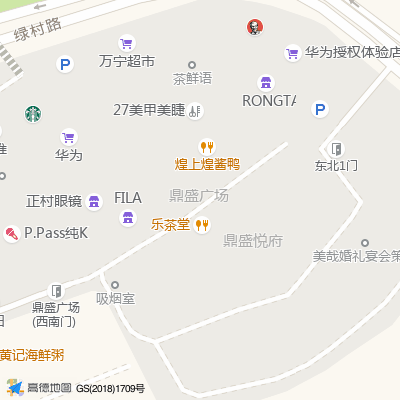

In [23]:
staticmap(location=鼎盛广场_location,zoom=19)

- 在静态地图中，例如放置标签，用户可以对历史到达定位打卡。

### 坐标转换

In [99]:
def coordinate_transform(locations,coordsys='gps',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/assistant/coordinate/convert?parameters'
    params={
        'key':key,
        'coordsys':coordsys,
        'locations':locations,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [100]:
transform_鼎盛= coordinate_transform(鼎盛广场_location)
transform_鼎盛

{'status': '1',
 'info': 'ok',
 'infocode': '10000',
 'locations': '110.407013075087,21.207899305556'}

In [101]:
df_transform = pd.json_normalize(transform_鼎盛)
df_transform

,status,info,infocode,locations
0,1,ok,10000,"110.407013075087,21.207899305556"


### 天气查询

In [24]:
def Weather_query(city,extensions='base')->dict:
    url = 'https://restapi.amap.com/v3/weather/weatherInfo?parameters'
    params={
        'key':key,
        'city':city,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [44]:
query_广州 = Weather_query(city='广州')
query_广州

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'lives': [{'province': '广东',
   'city': '广州市',
   'adcode': '440100',
   'weather': '多云',
   'temperature': '25',
   'winddirection': '东南',
   'windpower': '≤3',
   'humidity': '90',
   'reporttime': '2020-04-21 09:22:48'}]}

In [45]:
df_广州 = pd.json_normalize(query_广州['lives'])
df_广州

,province,city,adcode,weather,temperature,winddirection,windpower,humidity,reporttime
0,广东,广州市,440100,多云,25,东南,≤3,90,2020-04-21 09:22:48


- 对返回结果含有语音识别功能。

### 输入提示

In [63]:
def hint(keywords=None,type='分类代码',location=None,city='citycode',sig=None,citylimit='false',datatype='all',homeorcorp=None)->dict:
    url = 'https://restapi.amap.com/v3/assistant/inputtips?parameters'
    params={
        'key': key,
        'location':location,
        'keywords':keywords,
        'type':type,
        'city':city,
        'citylimit':citylimit,
        'datatype':datatype,
        'homeorcorp':homeorcorp,
        'homeorcorp':homeorcorp,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [73]:
hint_广州 = hint(keywords='星巴克',city='广州')
hint_广州

{'status': '1',
 'count': '10',
 'info': 'OK',
 'infocode': '10000',
 'tips': [{'id': [],
   'name': '星巴克',
   'district': [],
   'adcode': [],
   'location': [],
   'address': [],
   'typecode': [],
   'city': []},
  {'id': 'B0FFGPQWCV',
   'name': '星巴克(中华广场2店)',
   'district': '广东省广州市越秀区',
   'adcode': '440104',
   'location': '113.282517,23.125452',
   'address': '中山三路33号中华广场2层2016号铺区',
   'typecode': '050501',
   'city': []},
  {'id': 'B00140U3S7',
   'name': '星巴克(中华广场1店)',
   'district': '广东省广州市越秀区',
   'adcode': '440104',
   'location': '113.282542,23.125467',
   'address': '中山三路33号中华广场负一层A23号铺',
   'typecode': '050501',
   'city': []},
  {'id': 'B00141JHRA',
   'name': '星巴克(保利中环广场1店)',
   'district': '广东省广州市越秀区',
   'adcode': '440104',
   'location': '113.281492,23.136318',
   'address': '建设大马路18号保利中环广场南区1层B117-B120',
   'typecode': '050501',
   'city': []},
  {'id': 'B00140M49U',
   'name': '星巴克臻选(好世界广场店)',
   'district': '广东省广州市越秀区',
   'adcode': '440104',
   'location': '113.

In [74]:
df_星巴克 = pd.json_normalize(hint_广州['tips'])
df_星巴克

,id,name,district,adcode,location,address,typecode,city
0,[],星巴克,[],[],[],[],[],[]
1,B0FFGPQWCV,星巴克(中华广场2店),广东省广州市越秀区,440104,"113.282517,23.125452",中山三路33号中华广场2层2016号铺区,050501,[]
2,B00140U3S7,星巴克(中华广场1店),广东省广州市越秀区,440104,"113.282542,23.125467",中山三路33号中华广场负一层A23号铺,050501,[]
3,B00141JHRA,星巴克(保利中环广场1店),广东省广州市越秀区,440104,"113.281492,23.136318",建设大马路18号保利中环广场南区1层B117-B120,050501,[]
4,B00140M49U,星巴克臻选(好世界广场店),广东省广州市越秀区,440104,"113.285041,23.136374","环市东路362-363号好世界广场首层101-102B,二楼203A号铺",050501,[]
5,B0FFFP1GIM,星巴克(越秀北店),广东省广州市越秀区,440104,"113.272746,23.135433",越秀北路319号,050501,[]
6,B00140T1WY,星巴克(东山锦轩店),广东省广州市越秀区,440104,"113.295641,23.125093","农林下路4,6号东山锦轩大厦首层A6号铺",050501,[]
7,B00141USVK,星巴克(新粤新店),广东省广州市越秀区,440104,"113.280446,23.138983",环市东路329号新粤新酒店首层东侧自编1号,050501,[]
8,B00141S36B,星巴克(动漫星城1店),广东省广州市越秀区,440104,"113.265142,23.125674","吉祥路1号动漫星城负一层E1107A商铺,下沉广场层ED001,ED002商铺",050501,[]
9,B00141L0IY,星巴克(美东百货店),广东省广州市越秀区,440104,"113.296991,23.128663",农林下路37号广州美东百货店铺之首层1-Z01商铺,050501,[]


- 对返回结果进行排序，除了考虑距离离用户的远近外，也可以考虑返回结果的热度或者用户评分。

### 交通态势

In [89]:
def traffic(name,adcode,level=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/traffic/status/road?parameters'
    params={
        'key': key,
        'name':name,
        'level':level,
        'extensions':extensions,
        'adcode':adcode,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [96]:
traffic_北环 = traffic(name='北环大道',adcode='440300')
traffic_北环

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '北环大道：从北环南山立交到北环南海立交严重拥堵，银湖立交附近自西向东严重拥堵，从北环龙珠立交到北环沙河西立交严重拥堵。',
  'evaluation': {'expedite': '81.14%',
   'congested': '6.62%',
   'blocked': '12.24%',
   'unknown': '0.00%',
   'status': '2',
   'description': '基本畅通'}}}

In [97]:
df_北环 = pd.json_normalize(traffic_北环)
df_北环

,status,info,infocode,trafficinfo.description,trafficinfo.evaluation.expedite,trafficinfo.evaluation.congested,trafficinfo.evaluation.blocked,trafficinfo.evaluation.unknown,trafficinfo.evaluation.status,trafficinfo.evaluation.description
0,1,OK,10000,北环大道：从北环南山立交到北环南海立交严重拥堵，银湖立交附近自西向东严重拥堵，从北环龙珠立交...,81.14%,6.62%,12.24%,0.00%,2,基本畅通


- 使用定位功能，识别用户所在地方，返回周围道路选项，用户可以通过选择输入。
- 返回结果语音输出。

### 地理围栏

In [112]:
import requests
import json
def fence(name,center=None,radius=None,points=None,repeat=None,fixed_date=None,time=None,enable=None,valid_time=None,desc=None,alert_condition=None)->dict:
    url = 'https://restapi.amap.com/v4/geofence/meta?key=334190ffbcbd51cfe6c7f81594a9b9de'
    key_1 ="334190ffbcbd51cfe6c7f81594a9b9de"
    params={
         'key':key,
         'name':name,
         'center':center,
         'radius':radius,  
         'enable':enable,
         'valid_time':valid_time,
         'repeat':repeat,
         'fixed_date':fixed_date,
         'time':time,  
         'desc':desc,
         'alert_condition':alert_condition,
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [124]:
fence_3 = fence('Fence',center='30',radius='300')
fence_3

{'data': {'page_no': 1, 'page_size': 20, 'rs_list': [], 'total_record': 0},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

In [125]:
df_fence = pd.json_normalize(fence_3)
df_fence

,errcode,errdetail,errmsg,ext,data.page_no,data.page_size,data.rs_list,data.total_record
0,0,None,OK,None,1,20,[],0


###  尝试设计一个简单的应用

- 在旅游或者处于一个不太熟悉的环境时可以使用的小应用。
- 用户首先使用搜索POI功能；用户在输入一个目标时，可以返回周边POI，用户就可以便于对周围的美食，或者其他感兴趣的目标进行选择和前往。
- 用户也可以使用静态地图功能，通过用户选择，看到周边的目标挑选感兴趣的目标。
- 当然，用户在选定目标后，使用路径规划和交通态势功能，对比后选取最佳路线。
- 用户还可以对目标城市或者定位使用天气查询，天气原因也是用户选择的一个重要因素。